In [4]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
df = pd.read_csv('WHO/ledata.csv')
df = df.dropna()

del df['Country']
del df['Year']
del df['Status']

y = df['Life expectancy '].to_numpy()

del df['Life expectancy ']

A = df.to_numpy()

n_train = 1349

A_train = A[:1349:]
y_train = y[:1349]

A_test = A[1349::]
y_test = y[1349:]

print(A_train.shape)

## data normalization 

mA = A_train.mean(axis=0)
sA = A_train.std(axis=0)


A_train = (A_train-mA)/sA
A_test = (A_test-mA)/sA

m = y_train.mean()
y_train = y_train-m
y_test = y_test-m

(1349, 18)


In [6]:
def score(X_n,A,y): #return the coeff of determination
    y_pred= A@X_n
    return 1-(((y_pred-y)**2).sum())/(((y-y.mean())**2).sum())

def loss(X_n,A,y):
    return np.mean(1/2*np.square(A@X_n-y))

In [7]:
### Gradient descent

def grad_desc(A,y,eps=1e-2,lr = None,lamb= 0,verbose=0,itemax=170):
    X = np.zeros(A.shape[1])
    grad = np.array([1000]*A.shape[1])
    if lr == None:
        lr = 1/np.linalg.norm(A,2)**2   

    l_loss = []
    ite = 0
    while np.all(np.abs(grad) > eps) and ite<itemax:
        y_pred = A.dot(X)
        grad = np.dot(A.T,(y_pred-y))+2*lamb*X
        X = X - lr*grad 
        l_loss.append((1/2*(y_pred-y)**2+lamb*np.sum(np.square(X))).mean())
        ite+=1

    if verbose == 1:
        plt.figure(1)
        plt.plot(l_loss)
        plt.show()
        
    return X,l_loss

In [27]:
def heavy_ball(A,y,eps=1e-2,lr = None,verbose=0,gamma=0.3,itemax=170):
    X = np.zeros(A.shape[1])
    y_pred = A.dot(X)
    grad = np.dot(A.T,(y_pred-y))
    m = grad
    if lr == None:
        lr = 1/np.linalg.norm(A,2)**2   

    l_loss = []
    ite = 0
    while np.all(np.abs(grad) > eps) and ite<itemax:
        y_pred = A.dot(X)
        grad = np.dot(A.T,(y_pred-y))
        m = gamma*m+(1-gamma)*grad
        X = X - lr*m
        l_loss.append((1/2*(y_pred-y)**2).mean())
        ite+=1

    if verbose == 1:
        plt.figure(1)
        plt.plot(l_loss)
        plt.show()
        
    return X,l_loss

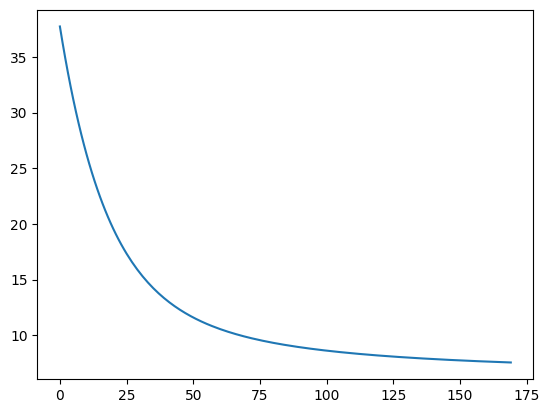

6.529254255244311


In [80]:
X,l_loss = heavy_ball(A_train,y_train,eps=1e-3,lr=3.820002412384121e-06,gamma=0.1,verbose=1)
y_pred = A_test.dot(X)

print(loss(X,A_test,y_test))

100%|██████████| 99/99 [00:02<00:00, 41.22it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


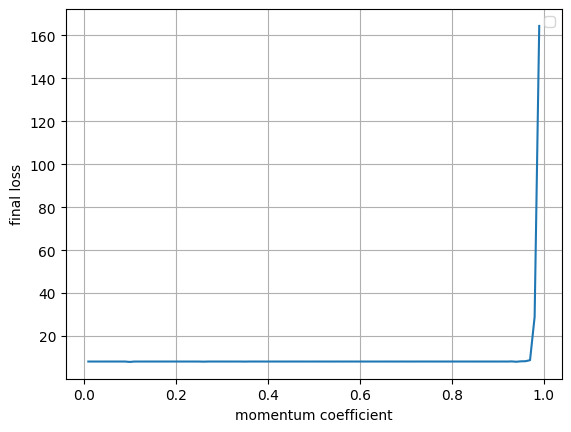

0.1


In [59]:
L_loss =[]


min=100
l_i=[0.01*k for k in range(1,100)]
for i in tqdm(l_i):
    X_n,l_loss = heavy_ball(A_train,y_train,eps=1e-3,gamma=i)
    l = loss(X_n,A_test,y_test)
    if l <min:
        min=l
        min_g = i
    L_loss.append(l)



plt.figure(1)
plt.plot(l_i,L_loss)
plt.xlabel('momentum coefficient')
plt.ylabel('final loss')
plt.xlim()
plt.ylim()
plt.grid()
plt.legend()
plt.show()
print(min_g)

100%|██████████| 199/199 [00:04<00:00, 43.55it/s]


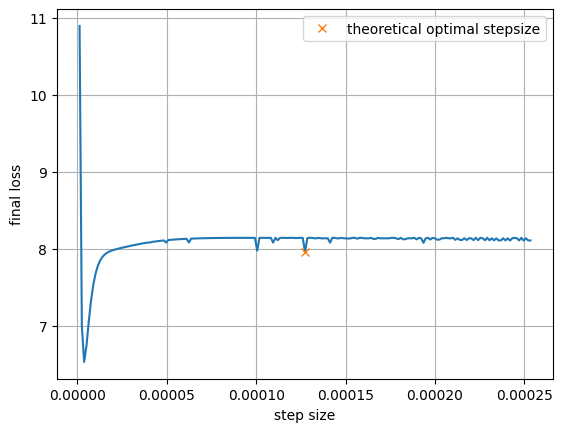

3.820002412384121e-06


In [77]:
L_loss =[]


min=100
lr_opt = 1/np.linalg.norm(A_train,2)**2   
l_i = [lr_opt*(1+i) for i in np.arange(-0.99,1,0.01)]
for i in tqdm(l_i):
    X_n,l_loss = heavy_ball(A_train,y_train,eps=1e-3,gamma=0.1,lr=i)
    l = loss(X_n,A_test,y_test)
    if l <min:
        min=l
        min_lr = i
    L_loss.append(l)

X_n,l_loss = heavy_ball(A_train,y_train,eps=1e-3,gamma=0.1,lr=lr_opt)
l = loss(X_n,A_test,y_test)

plt.figure(1)
plt.plot(l_i,L_loss)
plt.plot(lr_opt,l,'x',label='theoretical optimal stepsize')
plt.xlabel('step size')
plt.ylabel('final loss')
plt.xlim()
plt.ylim()
plt.grid()
plt.legend()
plt.show()
print(min_lr)

Non-convex loss function

In [ ]:
def grad_desc_non_convex(A,y,eps=1e-2,lr = None,lamb= 0.01,p=0.5,verbose=0,itemax=170):
    X = np.zeros(A.shape[1])
    grad = np.array([1000]*A.shape[1])
    if lr == None:
        lr = 1/np.linalg.norm(A,2)**2   

    l_loss = []
    ite = 0
    while np.all(np.abs(grad) > eps) and ite<itemax:
        y_pred = A.dot(X)
        grad = np.dot(A.T,(y_pred-y))+lamb*p*X^(p-1)
        X = X - lr*grad 
        l_loss.append((1/2*(y_pred-y)**2+lamb*np.sum(X^p)).mean())
        ite+=1

    if verbose == 1:
        plt.figure(1)
        plt.plot(l_loss)
        plt.show()
        
    return X,l_loss